# Introduction
**Dataset**: covid-data.csv
**Source**: Downloaded from Kaggle
**Objective**: To analyze and visualize the global impact of COVID-19 using Python libraries (Pandas, Matplotlib, Seaborn).
We’ll explore confirmed cases, deaths, recoveries, and weekly growth trends across countries and WHO regions.

# Importing Required Libraries

We import essential Python libraries for data analysis and visualization:

**Pandas** → for data manipulation

**Matplotlib** → for creating visual plots

**Seaborn** → for advanced statistical visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
Load the COVID-19 dataset into a Pandas DataFrame from the local system to begin the analysis process.

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\covid-data.csv")

# Data Cleaning and Preparation

Before analyzing, we prepare the data by:

**Checking dataset structure and datatypes using info()**

**Renaming columns (lowercase, removing spaces and slashes for easy access)**

**Displaying cleaned column names and previewing the dataset**

In [5]:
# Show basic info
df.info()

# Rename columns (remove spaces and slashes for easier access)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Preview cleaned column names
print(df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,deaths___100_cases,recovered___100_cases,deaths___100_recovered,confirmed_last_week,1_week_change,1_week_%_increase,who_region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Missing Values and Summary Statistics
We check for any **missing values in each column and generate a quick statistical summary using describe()** to understand the spread and distribution of numerical data.

In [6]:
# Check for missing data
print(df.isnull().sum())

# Quick summary
print(df.describe())

# Check unique WHO regions
print(df['who_region'].unique())

country_region            0
confirmed                 0
deaths                    0
recovered                 0
active                    0
new_cases                 0
new_deaths                0
new_recovered             0
deaths___100_cases        0
recovered___100_cases     0
deaths___100_recovered    0
confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
who_region                0
dtype: int64
          confirmed         deaths     recovered        active     new_cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


# Top 10 Countries by Confirmed Cases
Visualizing the **top 10 countries with the highest number of confirmed COVID-19 cases**.
This highlights regions that faced the largest outbreaks globally.

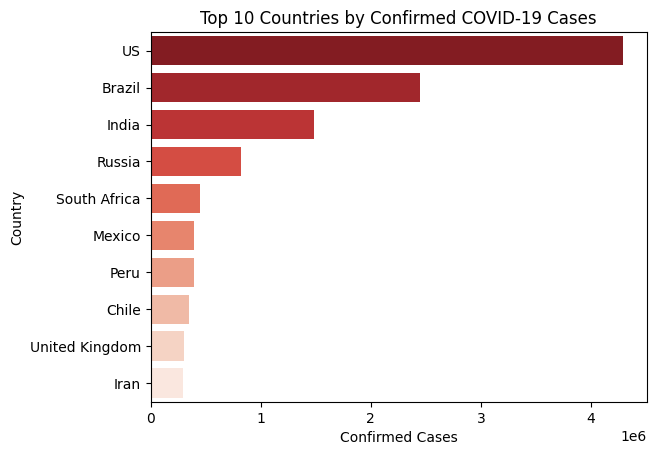

In [8]:
top_confirmed = df.nlargest(10, 'confirmed')
sns.barplot(x='confirmed', y='country_region', data=top_confirmed,
            hue='country_region', palette='Reds_r', legend=False)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

# Top 10 Countries by Total Deaths
A bar chart showing the **top 10 countries with the highest COVID-19 death toll**, revealing the most severely affected nations.

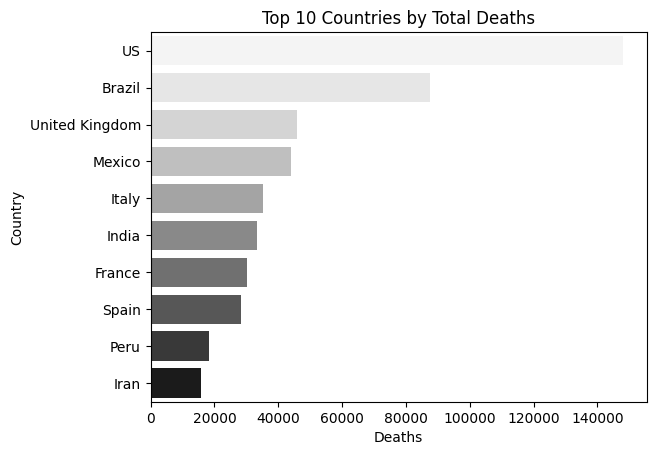

In [10]:
top_deaths = df.nlargest(10, 'deaths')
sns.barplot(x='deaths', y='country_region', data=top_deaths, hue='country_region', palette='Greys',legend=False)
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country')
plt.show()

# COVID-19 Summary by WHO Region

A grouped bar chart comparing **total confirmed cases, deaths, and recoveries** across each WHO region.
This gives a regional-level summary of the pandemic’s global spread.

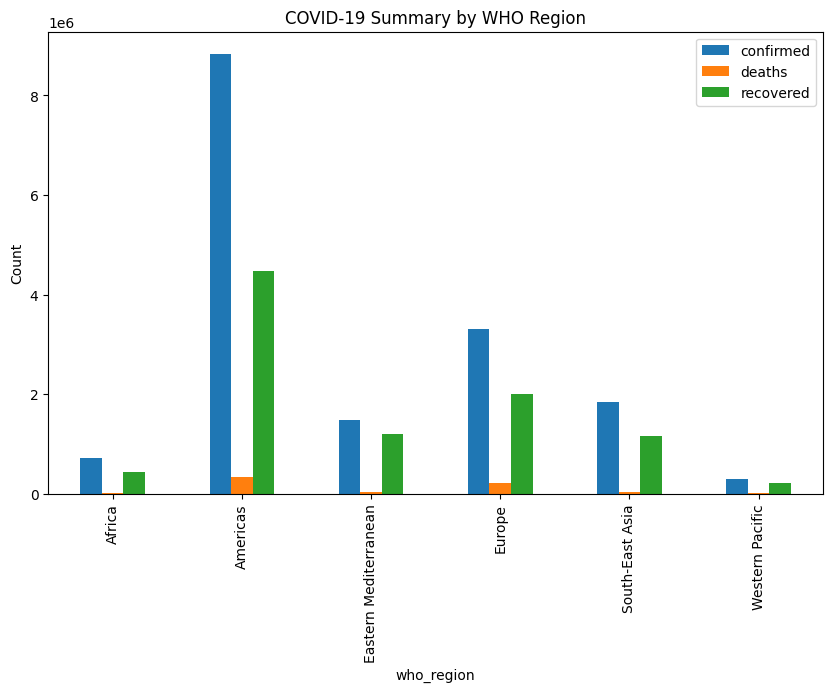

In [11]:
region_summary = df.groupby('who_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

region_summary.plot(
    x='who_region', 
    y=['confirmed', 'deaths', 'recovered'], 
    kind='bar', 
    figsize=(10,6)
)
plt.title('COVID-19 Summary by WHO Region')
plt.ylabel('Count')
plt.show()

# Top 10 Countries by Weekly % Increase

Visualization of countries showing the **highest weekly percentage increase in cases**, identifying areas with recent or ongoing surges.

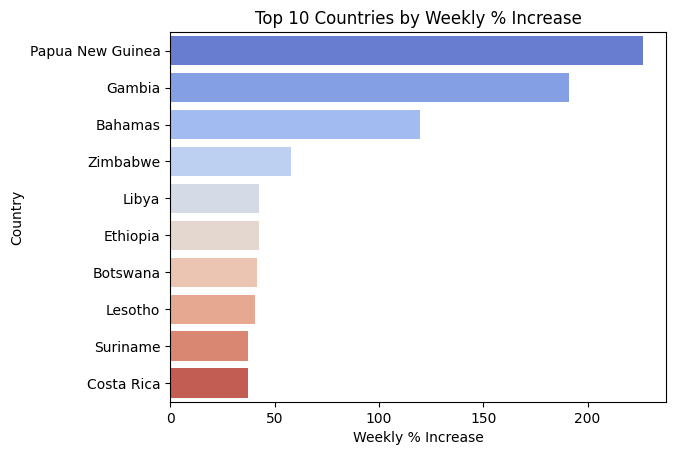

In [12]:
top_growth = df.nlargest(10, '1_week_%_increase')

sns.barplot(x='1_week_%_increase', y='country_region', data=top_growth, hue='country_region', palette='coolwarm',legend=False)
plt.title('Top 10 Countries by Weekly % Increase')
plt.xlabel('Weekly % Increase')
plt.ylabel('Country')
plt.show()

# Death Rate per 100 Cases

A histogram showing how **death rates per 100 cases** are distributed across different countries.
It helps assess global mortality patterns.

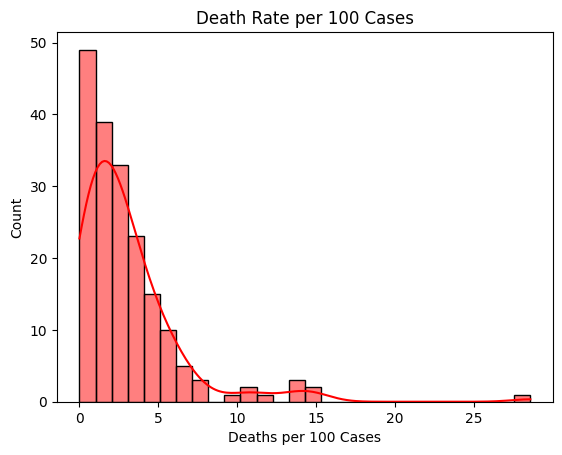

In [13]:
sns.histplot(df['deaths___100_cases'], kde=True, color='red')
plt.title('Death Rate per 100 Cases')
plt.xlabel('Deaths per 100 Cases')
plt.show()

# Deaths vs Recoveries by WHO Region

A scatter plot comparing **recoveries vs deaths, categorized by WHO region**.
This highlights how different regions performed in managing and recovering from the pandemic.

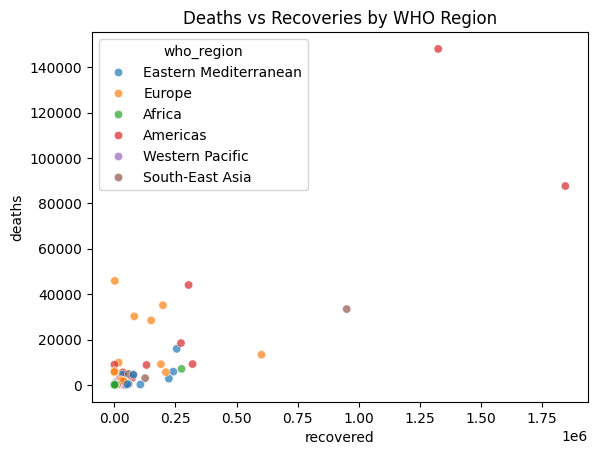

In [14]:
# Deaths vs Recoveries.
sns.scatterplot(data=df, x='recovered', y='deaths', hue='who_region', alpha=0.7)
plt.title('Deaths vs Recoveries by WHO Region')
plt.show()


# Conclusion

Through data visualization, this analysis provided a clear and data-driven understanding of the **global impact of COVID-19**. Each visualization played a key role in uncovering meaningful insights:

**Bar charts** highlighted the countries with the **highest confirmed cases and death tolls**, making it easy to identify global hotspots.

**Regional comparison charts** revealed how different **WHO regions** varied in total cases, deaths, and recoveries — showcasing the uneven spread and control efforts worldwide.

**Growth rate visualizations** helped identify countries still experiencing **rapid weekly increases**, emphasizing ongoing risks and trends.

**Distribution plots** of death rates per 100 cases provided an overview of **mortality severity** across nations.

**Scatter plots** comparing recoveries and deaths visually captured the relationship between **healthcare response and outcomes** across regions.

Overall, these visual insights turned raw data into **actionable understanding** — showing how visualization techniques can transform complex datasets into an accessible, story-driven interpretation of the pandemic’s trajectory.